In [1]:
from pathlib import Path
import xarray as xr
import geopandas as gpd

import matplotlib.pyplot as plt

In [4]:
gdf = gpd.read_file('/Users/rdcrlzh1/Documents/arctic-radarsat2/data/FY24_OLI_UTQ_rsgis_coherance_aois/FY24_OLI_UTQ_rsgis_coherance_aois.shp')
gdf = gdf[gdf.Location == 'Utqiagvik']

In [6]:
for fp in list(Path('/Users/rdcrlzh1/Documents/arctic-radarsat2/data/s1/utigavik').glob('*summer*.tif')):
    ds = xr.open_dataarray(fp).squeeze('band', drop = True) / 100

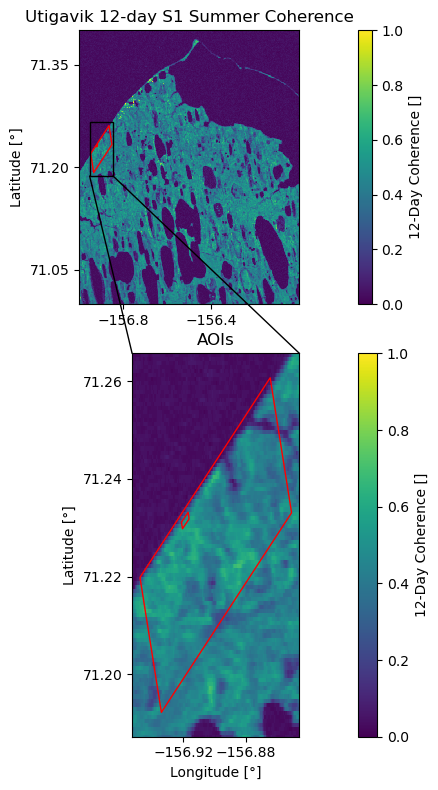

In [12]:
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch

fig, axes= plt.subplots(2, 1, figsize = (12, 8), height_ratios= [5, 7])

ax = axes[0]
ds.plot(ax = ax, vmin = 0, vmax = 1, add_colorbar=True, cbar_kwargs= {'label': '12-Day Coherence []'})
ax.set_ylim(71, 71.4)

ds.plot(ax = axes[1], vmin = 0, vmax = 1, add_colorbar=True, cbar_kwargs= {'label': '12-Day Coherence []'})


for ax in axes:
    ax.ticklabel_format(axis = 'both', style = 'plain', useOffset = False)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_ylabel('Latitude [°]')
    ax.set_facecolor("grey")
    gdf[gdf.Location == 'Utqiagvik'].plot(ax = ax, facecolor = "none", edgecolor = 'red')

xmin, ymin, xmax, ymax = gdf[gdf.Location == 'Utqiagvik'].total_bounds
buff = 0.005
axes[1].set_xlim(xmin - buff, xmax + buff)
axes[1].set_ylim(ymin - buff, ymax + buff)
width = (xmax + buff) - (xmin - buff)
height = (ymax + buff) - (ymin - buff)
rect = patches.Rectangle((xmin - buff, ymin - buff), width, height, linewidth=1, edgecolor='black', facecolor='none')
# Add the patch to the Axes
axes[0].add_patch(rect)
con1 = ConnectionPatch(xyA=(xmin - buff, ymin - buff), xyB=(xmin - buff, ymax + buff), coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[1], color="black")
axes[0].add_artist(con1)
con1 = ConnectionPatch(xyA=(xmax + buff, ymin - buff), xyB=(xmax + buff, ymax + buff), coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[1], color="black")
axes[0].add_artist(con1)

for i, r in gdf[gdf.Location == 'Oliktok'].iterrows():
    xmin, ymin, xmax, ymax = r.geometry.bounds
    xc, yc = (xmax + xmin) /2  , (ymin + ymax) / 2
    axes[1].text(xc, yc, r.Priority, color = 'red')

axes[0].set_xlabel('')
axes[1].set_xlabel('Longitude [°]')
axes[0].set_title('Utigavik 12-day S1 Summer Coherence')
axes[1].set_title('AOIs')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)